In [ ]:
import pandas as pd
import numpy as np
import random
import os

# https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data
# This datasets stored on Google Drive

In [ ]:
def url_to_df(initial_url):
  url = 'https://drive.google.com/uc?id=' + initial_url.split('/')[-2]
  df = pd.read_csv(url)
  return df

In [ ]:
humidity = url_to_df("https://drive.google.com/file/d/1U7dMDDv8qwAQgngJRlYUPHrQ0epnF4A8/view?usp=sharing")
temp = url_to_df("https://drive.google.com/file/d/1q5w_sA4TXp7_BXO3My7deVN6kjMCY7Jh/view?usp=sharing")
pressure = url_to_df("https://drive.google.com/file/d/1B3rvDllYEtCBVzUju0NsoVCy4Lo4np--/view?usp=sharing")

In [ ]:
# Get the "Dallas" column from
humidity_Dallas = humidity[['datetime','Dallas']]
temp_Dallas = temp[['datetime','Dallas']]
pressure_Dallas = pressure[['datetime','Dallas']]

In [ ]:
# Interpolate and dropping NAN values
humidity_Dallas.interpolate(inplace=True)
humidity_Dallas.dropna(inplace=True)

temp_Dallas.interpolate(inplace=True)
temp_Dallas.dropna(inplace=True)

pressure_Dallas.interpolate(inplace=True)
pressure_Dallas.dropna(inplace=True)

<ipython-input-5-77d9cd019bf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_Dallas.interpolate(inplace=True)
<ipython-input-5-77d9cd019bf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humidity_Dallas.dropna(inplace=True)
<ipython-input-5-77d9cd019bf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_Dallas.interpolate(inplace=True)
<ipython-input-5-77d9cd019bf6>:6: SettingWithCopyWarning: 
A value is trying to be

In [ ]:
# Renaming the "Dallas" column for clarity
humidity_Dallas = humidity_Dallas.rename(columns={'Dallas': 'humidity'})
temp_Dallas = temp_Dallas.rename(columns={'Dallas': 'temperature'})
pressure_Dallas = pressure_Dallas.rename(columns={'Dallas': 'pressure'})

In [ ]:
pressure_Dallas.head()

,datetime,pressure
1,2012-10-01 13:00:00,1011.0
2,2012-10-01 14:00:00,1011.0
3,2012-10-01 15:00:00,1011.0
4,2012-10-01 16:00:00,1011.0
5,2012-10-01 17:00:00,1011.0


In [ ]:
# Join the dataframes
df_combined = pd.merge(humidity_Dallas, temp_Dallas, on='datetime')
df_combined = pd.merge(df_combined, pressure_Dallas, on='datetime')

In [ ]:
df_combined.head()

,datetime,humidity,temperature,pressure
0,2012-10-01 13:00:00,87.0,289.740000,1011.0
1,2012-10-01 14:00:00,86.0,289.762974,1011.0
2,2012-10-01 15:00:00,86.0,289.830767,1011.0
3,2012-10-01 16:00:00,86.0,289.898560,1011.0
4,2012-10-01 17:00:00,86.0,289.966352,1011.0


In [ ]:
# Min-Max Scaling Normalization

# Selecting specific columns
columns_to_normalize = ['humidity', 'temperature', 'pressure']
df_selected = df_combined[columns_to_normalize]

# Min-Max Scaling
df_normalized_minmax = (df_selected - df_selected.min()) / (df_selected.max() - df_selected.min())
df_normalized_minmax.head()

,humidity,temperature,pressure
0,0.857143,0.532863,0.347826
1,0.846154,0.533298,0.347826
2,0.846154,0.534583,0.347826
3,0.846154,0.535867,0.347826
4,0.846154,0.537151,0.347826


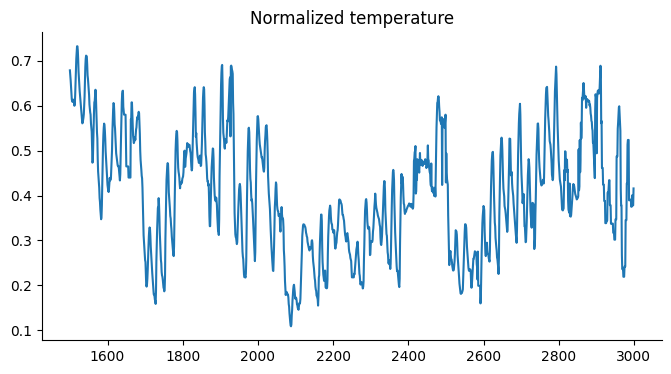

In [ ]:
from matplotlib import pyplot as plt
df_normalized_minmax['temperature'][1500:3000].plot(kind='line', figsize=(8, 4), title='Normalized temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

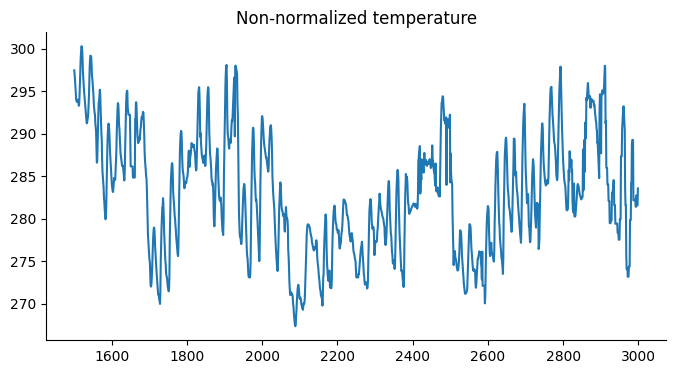

In [ ]:
df_combined['temperature'][1500:3000].plot(kind='line', figsize=(8, 4), title='Non-normalized temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

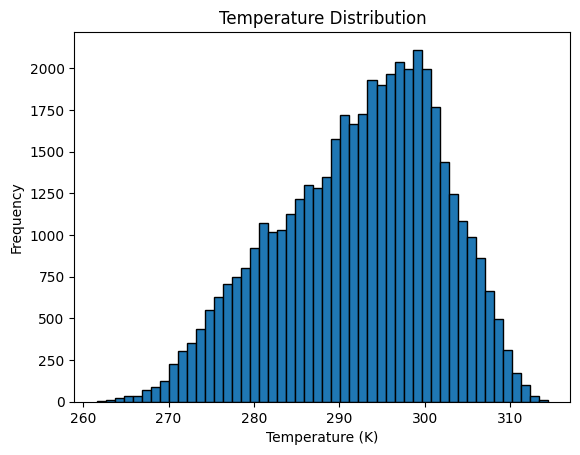

In [ ]:
plt.hist(df_combined['temperature'], bins=50, edgecolor='black')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

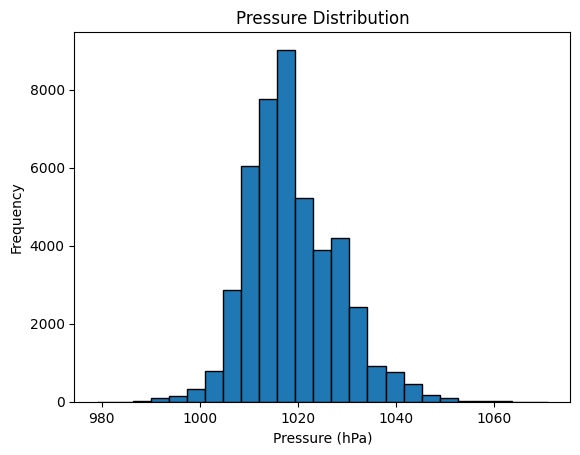

In [ ]:
plt.hist(df_combined['pressure'], bins=25, edgecolor='black')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.title('Pressure Distribution')
plt.show()

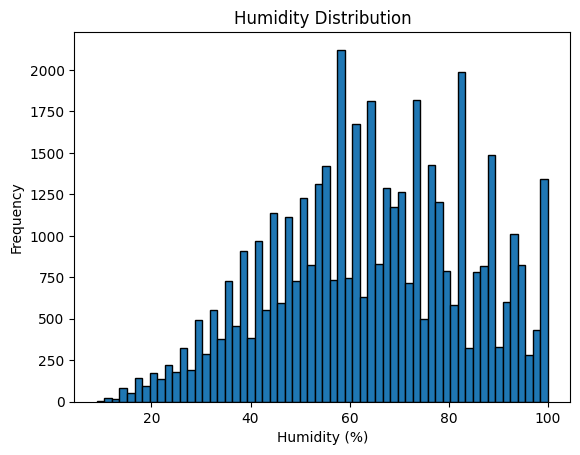

In [ ]:
plt.hist(df_combined['humidity'], bins=60, edgecolor='black')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.show()

These are the same graphs just shifted and streched

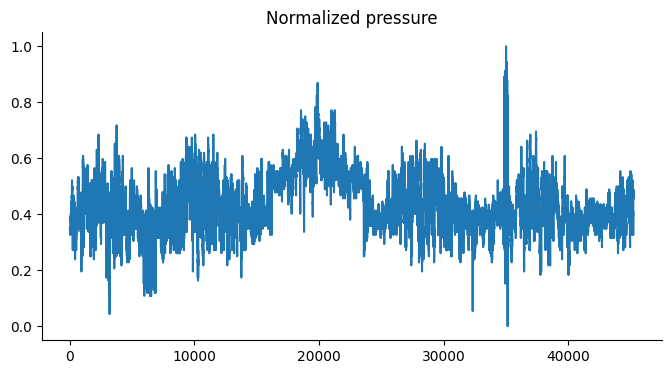

In [ ]:
df_normalized_minmax['pressure'].plot(kind='line', figsize=(8, 4), title='Normalized pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

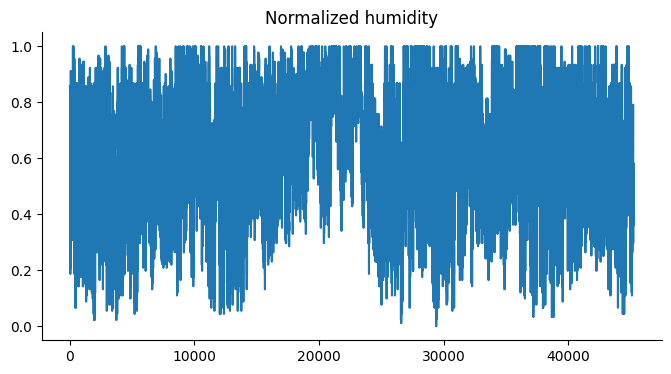

In [ ]:
df_normalized_minmax['humidity'].plot(kind='line', figsize=(8, 4), title='Normalized humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
class SimpleRNN:
  def __init__(self):
    self.weight_recurrent_layer = None
    self.weights_between_input_hidden = None
    self.weights_between_hidden_output = None

    self.bias_from_hidden = None
    self.bias_from_output = None

    # Default activation function is tanh
    self.activation_string = 'tanh'
    self.activation_function = self.tanh
    self.d_activation_function = self.tanh_derivative

    # Default Loss function is mse
    self.loss_string = 'Mean Square Error'
    self.loss_function = self.mse_loss
    self.d_loss_function = self.mse_loss_derivative

  # ACTIVATION FUNCTIONS ----------------------------------------
  # For the derivative, assume that the x is already converted to the activation function

  # Sigmoid Activation Function
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  # Derivative of Sigmoid Function
  def sigmoid_derivative(self, x):
    return x * (1 - x)

  # Tanh Activation Function
  def tanh(self, x):
    return np.tanh(x)

  # Derivative of Tanh Function
  def tanh_derivative(self, x):
    return 1 - x**2

  # ReLu Activation Function
  def relu(self, x):
    return np.maximum(0,x)

  # Derivative of ReLu Function
  def relu_derivative(self, x):
    return (x > 0) * 1

  # END OF ACTIVATION FUNCTIONS ----------------------------------------

  # LOSS FUNCTION
  # Mean Square Error
  def mse_loss(self, y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

  # Mean Square Error Derivative
  def mse_loss_derivative(self, y_true, y_pred):
    return np.mean((y_true - y_pred) * 2)

  # Mean Absolute Error
  def mae_loss(self, y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

  def mae_loss_derivative(self, y_true, y_pred):
    return np.sign(y_pred - y_true) / len(y_true)

  # END OF LOSS FUNCTIONS ----------------------------------------

  def change_loss(self, loss = 'mse'):
    if loss == 'mse':
      self.loss_string = 'Mean Square Error'
      self.loss_function = self.mse_loss
      self.d_loss_function = self.mse_loss_derivative

    elif loss == 'mae':
      self.loss_string = 'Mean Absolute Error'
      self.loss_function = self.mae_loss
      self.d_loss_function = self.mae_loss_derivative

    else:
      print("Accepted loss functions are 'mse' (Mean Square Error) and 'mae' (Mean Absolute Error)")


  def get_loss(self):
    return self.loss_string

  def change_activation(self, activation = 'tanh'):
    if activation == 'sigmoid':
      self.activation_function = self.sigmoid
      self.d_activation_function = self.sigmoid_derivative
      self.activation_string = activation

    elif activation == 'tanh':
      self.activation_function = self.tanh
      self.d_activation_function = self.tanh_derivative
      self.activation_string = activation

    elif activation == 'relu':
      self.activation_function = self.relu
      self.d_activation_function = self.relu_derivative
      self.activation_string = activation

    else:
      print("Accepted activation functions are 'tanh', 'sigmoid', and 'relu'")

  def get_activation(self):
    return self.activation_string

  # Initial Weights and Bias
  def create_weights_bias(self, input_layer_size = 3, hidden_layer_size=5):
    output_layer_size=1

    self.weight_recurrent_layer = np.random.randn(hidden_layer_size, hidden_layer_size) * 0.1
    self.weights_between_input_hidden = np.random.randn(input_layer_size, hidden_layer_size) * 0.1
    self.weights_between_hidden_output = np.random.randn(hidden_layer_size, output_layer_size) * 0.1

    self.bias_from_hidden = np.random.randn(hidden_layer_size) * 0.1
    self.bias_from_output = np.random.randn(output_layer_size) * 0.1

  # Shows each bias/weight array
  def show_weight_bias(self):
    print("weight_recurrent_layer")
    print(self.weight_recurrent_layer)
    print()
    print("weights_between_input_hidden")
    print(self.weights_between_input_hidden)
    print()
    print("weights_between_hidden_output")
    print(self.weights_between_hidden_output)
    print()
    print("bias_from_hidden")
    print(self.bias_from_hidden)
    print()
    print("bias_from_output")
    print(self.bias_from_output)
    print()

  def forward_propagation(self, X):

    # Stores the previous state
    self.previous_state = np.zeros((self.weight_recurrent_layer.shape[0]))

    # Stores the list of previous states
    self.previous_states_list = [self.previous_state]

    # Goes forward in time_steps
    for X_instance in X:
      self.hidden_net = np.dot(X_instance, self.weights_between_input_hidden) + np.dot(self.previous_state, self.weight_recurrent_layer) + self.bias_from_hidden
      self.hidden_out = self.activation_function(self.hidden_net)

      # Update the previous_state
      self.previous_state = self.hidden_out

      # Store the current state
      self.previous_states_list.append(self.previous_state)

    # END OF LOOP ---------------------------------------

    # For Regression, a linear activation function is applied to the output layer
    # Same as no activation function in practice
    output_net = np.dot(self.hidden_out, self.weights_between_hidden_output) + self.bias_from_output
    return output_net[0], self.previous_states_list

  # Adapted Back Propagation from this source.
  # https://towardsdatascience.com/backpropagation-in-rnn-explained-bdf853b4e1c2

  # previous_state -> h_t-1
  # Xt -> X_train[t] or X_instance
  # Wxh -> weights_between_input_hidden
  # Whh -> weight_recurrent_layer
  # Wyh -> weights_between_hidden_output
  # bh -> bias_from_hidden
  # by -> bias_from_output
  # yt -> hidden_out/previous_state

  def backward_propagation(self, X, d_y, previous_states_list, learning_rate=0.01):
    # Time_steps
    n = len(X)

    d_weights_between_hidden_output = np.dot(d_y, self.previous_states_list[n]).reshape(-1, 1)

    # dLoss/dbh (linear activation function)
    d_bias_from_output = d_y

    # Gradients to be calculated stepping backwards in time
    d_weights_between_input_hidden = np.zeros(self.weights_between_input_hidden.shape)
    d_weight_recurrent_layer = np.zeros(self.weight_recurrent_layer.shape)
    d_bias_from_hidden = np.zeros(self.bias_from_hidden.shape)

    # dLoss/dyt (linear activation function)
    d_loss_current_time_step = np.dot(self.weights_between_hidden_output.T, d_y)

    # Stepping backwards in time
    for i in reversed(range(n)):

      d_loss_hidden = (self.d_activation_function(self.previous_states_list[i+1]) * d_loss_current_time_step)[0]
      d_weights_between_input_hidden += np.outer(X[i], d_loss_hidden)
      #
      d_weight_recurrent_layer += np.dot(d_loss_hidden, self.previous_states_list[i])
      d_bias_from_hidden += d_loss_hidden

    # https://www.geeksforgeeks.org/numpy-clip-in-python/#

    # Clip all the gradients to deal with exploding gradients
    # NOTE THIS BREAKS BACKPROP
    #d_weight_recurrent_layer = np.clip(d_weight_recurrent_layer, a_min = -100, a_max = 100, )
    #d_weights_between_input_hidden = np.clip(d_weights_between_input_hidden, a_min = -100, a_max = 100)
    #d_weights_between_hidden_output = np.clip(d_weights_between_hidden_output, a_min = -100, a_max = 100)
    #d_bias_from_hidden = np.clip(d_bias_from_hidden, a_min = -100, a_max = 100)
    #d_bias_from_output = np.clip(d_bias_from_output, a_min = -100, a_max = 100)


    # Update weights and bias
    self.weight_recurrent_layer -= learning_rate * d_weight_recurrent_layer
    self.weights_between_input_hidden -= learning_rate * d_weights_between_input_hidden
    self.weights_between_hidden_output -= learning_rate * d_weights_between_hidden_output
    self.bias_from_hidden -= learning_rate * d_bias_from_hidden
    self.bias_from_output -= learning_rate * d_bias_from_output

  def train(self, X_train, y_train, learning_rate=0.01, epochs = 10):
    loss_list = []
    y_pred_list = []
    current_epoch = 0
    total_loss = []

    for epoch in range(epochs):
      current_epoch += 1

      for i in range(len(X_train)):

        y_pred, previous_states_list = self.forward_propagation(X_train[i])
        y_pred_list.append(y_pred)

        y_true = y_train[i]

        loss = self.mse_loss(y_pred, y_true)
        loss_list.append(loss)

        y_diff = self.mse_loss_derivative(y_pred, y_true)

        self.backward_propagation(X_train[i], y_diff, previous_states_list, learning_rate=learning_rate)

      mean = np.mean(loss_list)
      total_loss.append(mean)
      print("Epoch: ", current_epoch, "\tTraining loss: ", mean, "\n---------------------------------------------------------")

    return total_loss, y_pred_list

  def test(self, X_test, y_test, return_pred=False):
    loss_list = []
    mae_loss_list = []
    y_pred_list = []
    for i in range(len(X_test)):
      y_pred, previous_states_list = self.forward_propagation(X_test[i])
      y_pred_list.append(y_pred)

      y_true = y_test[i]

      loss = self.mse_loss(y_pred, y_true)
      loss_list.append(loss)
      mae_loss = self.mae_loss(y_pred, y_true)
      mae_loss_list.append(mae_loss)

    mean = np.mean(loss_list)
    print("\nTesting loss: ", mean)
    mae_mean = np.mean(mae_loss_list)

    if return_pred:
      return y_pred_list, mean, mae_mean
    return mean

In [ ]:
X = df_normalized_minmax[['humidity', 'temperature', 'pressure']].values
y = df_normalized_minmax['temperature'].values

In [ ]:
def create_sequences(X,  time_steps=10):
  Xs = []

  for i in range(len(X)):
    start_index = i - time_steps + 1
    if start_index < 0:
      start_index = 0

    Xs.append(X[start_index:i])

  # Remove the first N instances since they will not have a history of N steps
  Xs = Xs[time_steps:]

  return Xs

In [ ]:
def train_test_split(X, y, N=10, split_percentage=0.8, input_only_temp = False):
  X_temp_humid_pressure = create_sequences(X, N)
  y_temp = y[N:]
  X_temp = create_sequences(y, N)
  input_layer_size = 0

  split_index = int(split_percentage * len(X_temp))

  if input_only_temp:
    input_layer_size = 1
    X_train, X_test = X_temp[:split_index], X_temp[split_index:]

    # Reshaping from 1 X N to N x 1
    for i, x in enumerate(X_train):
      X_train[i] = x.reshape(-1, 1)

    for i, x in enumerate(X_test):
      X_test[i] = x.reshape(-1, 1)

  else:
    input_layer_size = 3
    X_train, X_test = X_temp_humid_pressure[:split_index], X_temp_humid_pressure[split_index:]

  y_train, y_test = y_temp[:split_index], y_temp[split_index:]

  # Shuffle the training data
  shuffled = list(zip(X_train, y_train))
  random.shuffle(shuffled)

  X_train, y_train = zip(*shuffled)

  return X_train, X_test, y_train, y_test, input_layer_size

In [ ]:
def driver(X, y, N=10, split_percentage=0.8, input_only_temp = False, hidden_layer_size = 50, learning_rate=0.01, epochs = 10, activation_function = 'tanh', loss_function='mse', exp_num = 1):
  X_train, X_test, y_train, y_test, input_layer_size = train_test_split(X, y, N, split_percentage, input_only_temp)
  RNN = SimpleRNN()
  RNN.create_weights_bias(input_layer_size=input_layer_size, hidden_layer_size = hidden_layer_size)
  RNN.change_activation(activation_function)
  RNN.change_loss(loss_function)
  loss_func = RNN.get_loss()

  pretrain_loss = RNN.test(X_test, y_test)

  training_loss, y_pred_list = RNN.train(X_train, y_train, learning_rate=learning_rate, epochs = epochs)
  #print("train pred", y_pred_list[:50])
  #print("actual", y_train[:50])

  test_loss = RNN.test(X_test, y_test)

  # TO WRITE TO FILE

  params_chosen = (
    f"\tNumber of Layers: 3\n"
    f"\tNumber of Input Neurons: {input_layer_size}\n"
    f"\tNumber of Hidden Recurrent Neurons: {hidden_layer_size}\n"
    f"\tNumber of Output Neurons: 1\n"
    f"\tActivation Function: {activation_function}\n"
    f"\tLoss Function: {loss_func}\n"
    f"\tLearning Rate: {learning_rate}\n"
    f"\tNumber of epochs: {epochs}\n"
    f"\tNumber of time steps: {N}\n"
)

  results = (
    f"\tTrain/Test Split: {split_percentage*100}% : {100 - split_percentage*100}%\n"
    f"\tLength of train: {len(X_train)}\n"
    f"\tLength of test: {len(X_test)}\n"
    f"\tLoss of Testing before Training: {pretrain_loss}\n"
    f"\tLoss of Training: {training_loss[-1]}\n"
    f"\tLoss of Testing: {test_loss}\n"
)

  with open('log.txt', 'a') as f :
    f.write(f"Experiment Number: {exp_num}\n")
    f.write("Parameters Chosen:\n")
    f.write(params_chosen)
    f.write("Results:\n")
    f.write(results)
    f.write("------------------------------------------------------------------------------------------\n\n")

  return RNN, training_loss, test_loss

In [ ]:
param_grid = [
    {'lr': 0.015, 'activation': 'sigmoid', 'hidsize': 5},
    {'lr': 0.015, 'activation': 'sigmoid', 'hidsize': 20},
    {'lr': 0.015, 'activation': 'sigmoid', 'hidsize': 50},
    {'lr': 0.001, 'activation': 'sigmoid', 'hidsize': 5 },
    {'lr': 0.001, 'activation': 'sigmoid', 'hidsize': 20 },
    {'lr': 0.001, 'activation': 'sigmoid', 'hidsize': 50 },
    {'lr': 0.01, 'activation': 'sigmoid', 'hidsize': 5},
    {'lr': 0.01, 'activation': 'sigmoid', 'hidsize': 20},
    {'lr': 0.01, 'activation': 'sigmoid', 'hidsize': 50},
    {'lr': 0.015, 'activation': 'tanh', 'hidsize': 5},
    {'lr': 0.015, 'activation': 'tanh', 'hidsize': 20},
    {'lr': 0.015, 'activation': 'tanh', 'hidsize': 50},
    {'lr': 0.001, 'activation': 'tanh', 'hidsize': 5 },
    {'lr': 0.001, 'activation': 'tanh', 'hidsize': 20 },
    {'lr': 0.001, 'activation': 'tanh', 'hidsize': 50 },
    {'lr': 0.01, 'activation': 'tanh', 'hidsize': 5},
    {'lr': 0.01, 'activation': 'tanh', 'hidsize': 20},
    {'lr': 0.01, 'activation': 'tanh', 'hidsize': 50},
    {'lr': 0.015, 'activation': 'relu', 'hidsize': 5},
    {'lr': 0.015, 'activation': 'relu', 'hidsize': 20},
    {'lr': 0.015, 'activation': 'relu', 'hidsize': 50},
    {'lr': 0.001, 'activation': 'relu', 'hidsize': 5 },
    {'lr': 0.001, 'activation': 'relu', 'hidsize': 20 },
    {'lr': 0.001, 'activation': 'relu', 'hidsize': 50 },
    {'lr': 0.01, 'activation': 'relu', 'hidsize': 5 },
    {'lr': 0.01, 'activation': 'relu', 'hidsize': 20 },
    {'lr': 0.01, 'activation': 'relu', 'hidsize': 50 },
]

In [ ]:
count = 0
all_training_loss = []
all_testing_loss = []
all_rnn = []
for params in param_grid:
  count +=1
  RNN, training_loss, testing_loss = driver(X, y, N=10, split_percentage=0.2, input_only_temp = True, hidden_layer_size = params['hidsize'], learning_rate=params['lr'], epochs = 10, activation_function = params['activation'], loss_function='mse', exp_num= count)
  all_training_loss.append(training_loss)
  all_testing_loss.append(testing_loss)
  all_rnn.append(RNN)


Testing loss:  0.2571561237048557
Epoch:  1 	Training loss:  0.011907753934270881 
---------------------------------------------------------
Epoch:  2 	Training loss:  0.0063298285351945606 
---------------------------------------------------------
Epoch:  3 	Training loss:  0.0044624034555592875 
---------------------------------------------------------
Epoch:  4 	Training loss:  0.0035273591854145655 
---------------------------------------------------------
Epoch:  5 	Training loss:  0.0029657432114568514 
---------------------------------------------------------
Epoch:  6 	Training loss:  0.0025908951658156804 
---------------------------------------------------------
Epoch:  7 	Training loss:  0.0023227727863534445 
---------------------------------------------------------
Epoch:  8 	Training loss:  0.002121383682987958 
---------------------------------------------------------
Epoch:  9 	Training loss:  0.001964575269137172 
------------------------------------------------------

In [ ]:
# Train RNN on the best parameters
# print(np.min(all_testing_loss))
best_params = {'lr': 0.015, 'activation': 'sigmoid', 'hidsize': 20}
split_p = 0.2
best_RNN, best_training_loss, best_testing_loss = driver(X, y, N=10, split_percentage=split_p, input_only_temp = True, hidden_layer_size = best_params['hidsize'], learning_rate=best_params['lr'], epochs = 10, activation_function = best_params['activation'], loss_function='mse')
print("Best parameters:", best_params)
print("Best Train MSE:", np.min(best_training_loss))
print("Best Test MSE:", best_testing_loss)


Testing loss:  0.557753969662088
Epoch:  1 	Training loss:  0.009944333159861898 
---------------------------------------------------------
Epoch:  2 	Training loss:  0.0053454648375648025 
---------------------------------------------------------
Epoch:  3 	Training loss:  0.0038072239021009454 
---------------------------------------------------------
Epoch:  4 	Training loss:  0.003039269046110977 
---------------------------------------------------------
Epoch:  5 	Training loss:  0.002579885403258873 
---------------------------------------------------------
Epoch:  6 	Training loss:  0.00227440092822187 
---------------------------------------------------------
Epoch:  7 	Training loss:  0.002056540367280455 
---------------------------------------------------------
Epoch:  8 	Training loss:  0.0018933923642196935 
---------------------------------------------------------
Epoch:  9 	Training loss:  0.0017666997209713057 
---------------------------------------------------------


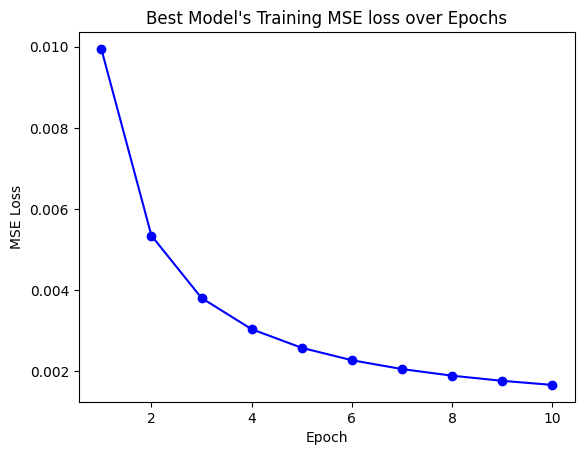

In [ ]:
import matplotlib.pyplot as plt

# Show epoch vs Loss
N = len(best_training_loss)

# Create the array from 0 to N
epochs = np.arange(1, N + 1)

# Plot the training loss over epochs
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')

plt.title('Best Model\'s Training MSE loss over Epochs')

plt.plot(epochs, best_training_loss, marker='o', linestyle='-', color='b')

In [ ]:
def r_squared(y_actual, y_pred):
  # Mean of actual values
    mean = np.mean(y_actual)
    # Total sum of squares
    sst = np.sum((y_actual - mean) **  2)
    # Residual sum of squares
    ssr = np.sum((y_actual - y_pred) **  2)
    # R^2
    r_square = 1 - (ssr / sst)
    return r_square

In [ ]:
X_train, X_test, y_train, y_test, input_layer_size = train_test_split(X, y, N=10, split_percentage=split_p, input_only_temp=True)
sindex = 0
eindex = 1000
preds = []
preds, best_mean, best_mae = best_RNN.test(X_test[sindex:eindex], y_test[sindex:eindex], return_pred=True)
print("MAE Loss:", best_mae)
print("R^2 score:", r_squared(y_test[sindex:eindex], preds))

# for index in range(sindex,eindex):
#   best_y_pred, best_mean = best_RNN.test(X_test[index:index+1], y_test[index:index+1], return_pred=True)
#   # print(best_y_pred, best_mean)
#   preds.append(best_y_pred)


Testing loss:  0.0011923219625498693
MAE Loss: 0.018966843567625326
R^2 score: 0.8910525351501637


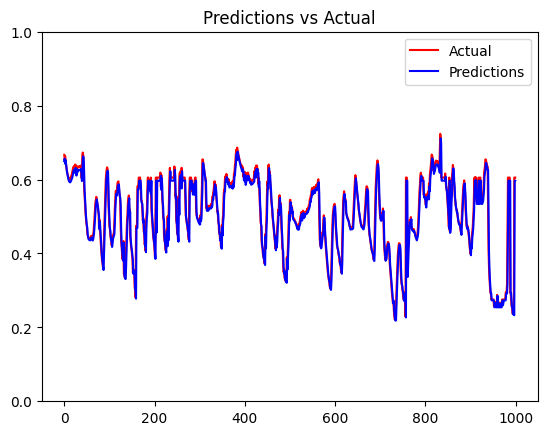

In [ ]:
# Plot best_y_pred and y_test

# Plotting the data with different colors
actuals = y_test[sindex:eindex]
plt.ylim(0, 1)
plt.plot(actuals, color='red', label='Actual')
# plt.plot(best_y_pred[sindex:eindex], color='blue', label='Predictions')
plt.plot(preds, color='blue', label='Predictions')
# plt.plot(mod_preds, color='blue', label='Predictions')

# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

In [ ]:
def compare(attribute, values, title):
  lr001_indices = np.where(np.array([param[attribute] for param in param_grid]) == values[0])[0]
  lr01_indices = np.where(np.array([param[attribute] for param in param_grid]) == values[1])[0]
  lr015_indices = np.where(np.array([param[attribute] for param in param_grid]) == values[2])[0]

  lr001_testing_loss = np.min([all_testing_loss[i] for i in lr001_indices])
  lr01_testing_loss = np.min([all_testing_loss[i] for i in lr01_indices])
  lr015_testing_loss = np.min([all_testing_loss[i] for i in lr015_indices])
  print(lr001_testing_loss, lr01_testing_loss, lr015_testing_loss)

  x_values = [str(value) for value in values]
  y_values = [lr001_testing_loss, lr01_testing_loss, lr015_testing_loss]
  all_colors = ['red', 'blue', 'green', 'teal', 'orange', 'purple', 'grey']

  plt.bar(x_values, y_values, color=random.sample(all_colors, 3))
  plt.ylim(0.98*np.min(y_values),1.02*np.max(y_values))

  plt.xlabel(attribute)
  plt.ylabel('MSE Error')
  plt.title(title)
  plt.show()

0.0006247157177713153 0.0007029455588692906 0.0006031206747151746


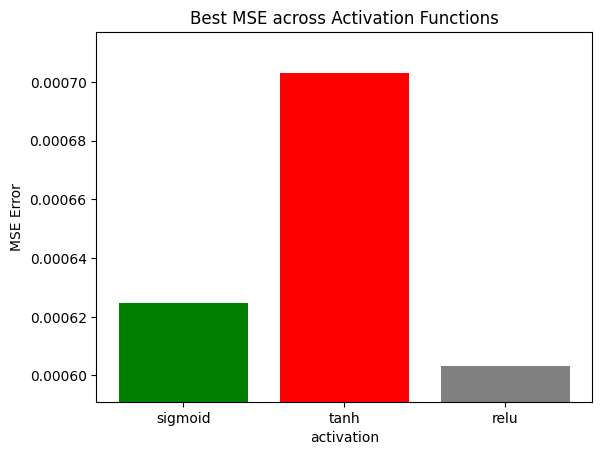

In [ ]:
compare("activation", ["sigmoid", 'tanh', 'relu'], title="Best MSE across Activation Functions")

0.0006031206747151746 0.0006451506526670033 0.0006299836389522479


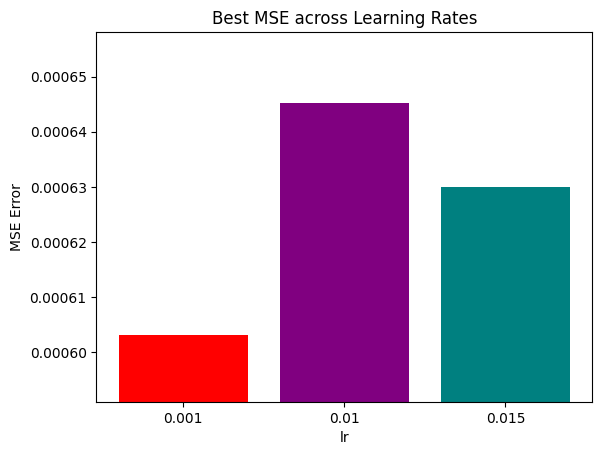

In [ ]:
compare("lr", [0.001, 0.01, 0.015], title='Best MSE across Learning Rates')

0.0006031206747151746 0.0006451506526670033 0.0006247157177713153


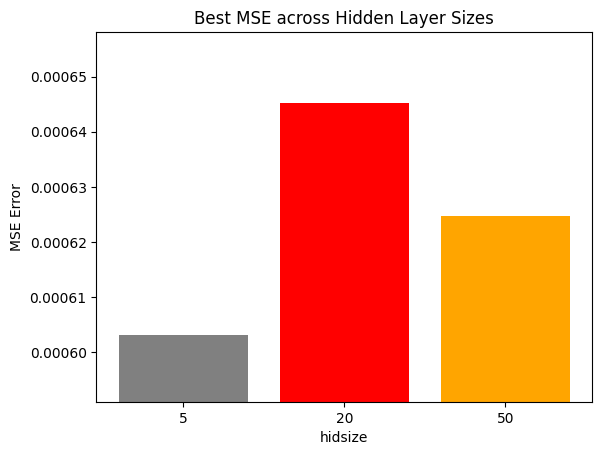

In [ ]:
compare("hidsize", [5,20,50], title="Best MSE across Hidden Layer Sizes")